## TP3

### Regression linéaire à la main

In [1]:
import numpy as np
import matplotlib . pyplot as plt

time = np.array(range(11))
salt = np.array([20, 17.4, 15.5, 13.8, 13.2, 12.3, 11.7, 11.3, 10.8, 10.7, 10.4])


In [2]:
def Var(y):
    n = len(y)
    return sum((i - np.mean(y))**2 for i in y) / (n-1)

def Cov(x,y):
    n = len(y)
    return sum((y[i] - np.mean(y))*(x[i] - np.mean(x)) for i in range(n)) / (n-1)

def computeCoefs(x,y):
    B1 = Cov(x,y)/ Var(x)
    return (np.mean(y) - (B1 * np.mean(x)),B1)

In [4]:
def scTot(x, y):
    return (len(y)-1) * Var(y)

def scReg(x, y):

    B0, B1 = computeCoefs(x, y)
    yp = B0 + B1*x

    return sum(
    (yp[i] - np.mean(y))**2
    for i in range(len(y)))

def DetCoef(x, y):
    return (scReg(x,y)) / (scTot(x,y))

0.8643569434155791


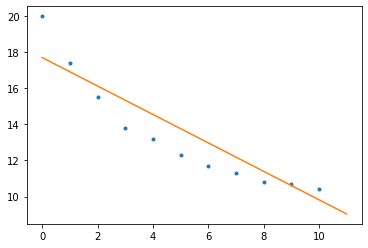

In [7]:
def ex1v1():
    x = np.linspace(0,11, 11)

    B1, B0 = computeCoefs(time, salt)
    y = B0*time + B1

    plt.plot(time, salt, '.')
    plt.plot(x, y)
    print(DetCoef(time, salt))
    plt.show()

ex1v1()

0.9939047109967369


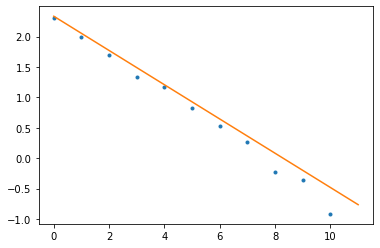

In [6]:
def ex1v2():
    x = np.linspace(0,11, 11)
    y = np.log((salt - 10))

    B1, B0 = computeCoefs(time, y)
    det = B0*time + B1

    plt.plot(time, y, '.')
    plt.plot(x, det)

    print(DetCoef(time, y))
    plt.show()

ex1v2()

### 2 Regression lineaire avec Scikit Learn

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [10]:
ozone = pd.read_csv('ozone.txt', sep=' ')
print(ozone)

          maxO3    T9   T12   T15  Ne9  Ne12  Ne15     Vx9    Vx12    Vx15  \
20010601     87  15.6  18.5  18.4    4     4     8  0.6946 -1.7101 -0.6946   
20010602     82  17.0  18.4  17.7    5     5     7 -4.3301 -4.0000 -3.0000   
20010603     92  15.3  17.6  19.5    2     5     4  2.9544  1.8794  0.5209   
20010604    114  16.2  19.7  22.5    1     1     0  0.9848  0.3473 -0.1736   
20010605     94  17.4  20.5  20.4    8     8     7 -0.5000 -2.9544 -4.3301   
...         ...   ...   ...   ...  ...   ...   ...     ...     ...     ...   
20010925     84  13.3  17.7  17.8    3     5     6  0.0000 -1.0000 -1.2856   
20010927     77  16.2  20.8  22.1    6     5     5 -0.6946 -2.0000 -1.3681   
20010928     99  16.9  23.0  22.6    6     4     7  1.5000  0.8682  0.8682   
20010929     83  16.9  19.8  22.1    6     5     3 -4.0000 -3.7588 -4.0000   
20010930     70  15.7  18.6  20.7    7     7     7  0.0000 -1.0419 -4.0000   

          maxO3v   vent  pluie  
20010601      84   Nord    Sec

In [13]:
cols = pd.DataFrame(ozone, columns=['maxO3','T12'])
print(cols)

          maxO3   T12
20010601     87  18.5
20010602     82  18.4
20010603     92  17.6
20010604    114  19.7
20010605     94  20.5
...         ...   ...
20010925     84  17.7
20010927     77  20.8
20010928     99  23.0
20010929     83  19.8
20010930     70  18.6

[112 rows x 2 columns]


In [22]:
cols.describe()

,maxO3,T12
count,112.000000,112.000000
mean,90.303571,21.526786
std,28.187225,4.042321
min,42.000000,14.000000
25%,70.750000,18.600000
50%,81.500000,20.550000
75%,106.000000,23.550000
max,166.000000,33.500000


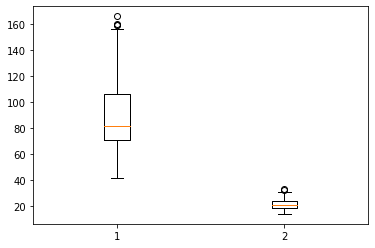

In [25]:
plt.boxplot(cols)
plt.show()

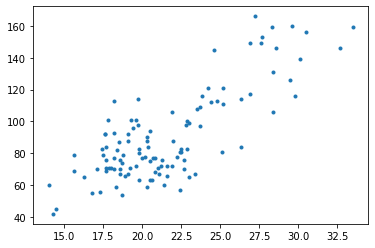

In [30]:
plt.plot(cols['T12'],cols['maxO3'],'.')

In [34]:
T12 = np.array(cols['T12']).reshape(1,-1)
maxO3 = np.array(cols['maxO3']).reshape(1,-1)
LinearRegression.fit(T12,maxO3)

TypeError: fit() missing 1 required positional argument: 'y'